In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.
# In real life we would use an existing data set.

In [3]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [4]:
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906]])

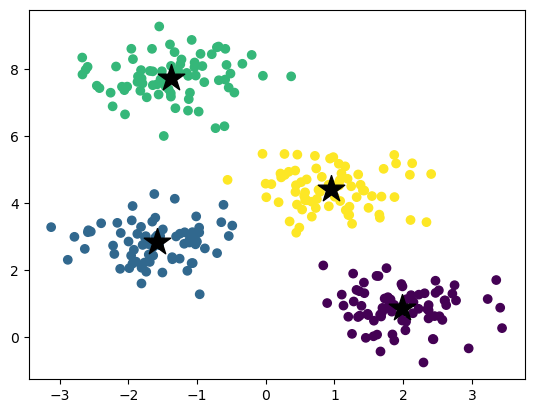

In [5]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

In [6]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/customers.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

In [7]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food
410,6633,2096,4563,1389
289,42786,286,471,1388
231,2344,10678,3828,1439
406,25066,5010,5026,9806
186,3009,521,854,3470


In [8]:
df.shape

(440, 4)

In [9]:
df.hist

<bound method hist_frame of      Fresh_Food   Milk  Grocery  Frozen_Food
0         12669   9656     7561          214
1          7057   9810     9568         1762
2          6353   8808     7684         2405
3         13265   1196     4221         6404
4         22615   5410     7198         3915
..          ...    ...      ...          ...
435       29703  12051    16027        13135
436       39228   1431      764         4510
437       14531  15488    30243          437
438       10290   1981     2232         1038
439        2787   1698     2510           65

[440 rows x 4 columns]>

In [10]:
number_of_clusters = 3

In [11]:
cluster = KMeans(n_clusters = number_of_clusters)

In [12]:
result = cluster.fit_transform(df)

In [13]:
cluster.cluster_centers_

array([[ 8119.69387755, 18812.93877551, 27745.36734694,  2011.42857143],
       [ 8234.99093656,  3824.33836858,  5322.42296073,  2568.73716012],
       [35941.4       ,  6044.45      ,  6288.61666667,  6713.96666667]])

In [14]:
df['cluster_number'] = cluster.predict(df)

In [15]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food,cluster_number
1,7057,9810,9568,1762,1
120,17160,1200,3412,2417,1
249,8040,3795,2070,6340,1
179,3157,4888,2500,4477,1
102,2932,6459,7677,2561,1


In [16]:
df.cluster_number.value_counts()

cluster_number
1    331
2     60
0     49
Name: count, dtype: int64

In [17]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/seeds.csv"


In [18]:
df2 = pd.read_csv(URL2)

In [19]:
number_of_clusters = 4

In [20]:
cluster = KMeans(n_clusters = number_of_clusters)
result = cluster.fit_transform(df2)

In [21]:
print(cluster.cluster_centers_)

[[12.09045455 13.30977273  0.85708636  5.21740909  2.90065909  3.34375
   5.00531818]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [14.93031746 14.59285714  0.88054286  5.61179365  3.31184127  2.72732063
   5.24295238]
 [11.9847619  13.29357143  0.85079524  5.24138095  2.8797381   5.6732619
   5.12197619]]


In [22]:
df2['cluster_number'] = cluster.predict(df2)

In [23]:
df2.sample(5)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cluster_number
55,15.03,14.77,0.8658,5.702,3.212,1.933,5.439,2
172,11.27,12.97,0.8419,5.088,2.763,4.309,5.000,0
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,1
196,12.79,13.53,0.8786,5.224,3.054,5.483,4.958,3
50,14.43,14.40,0.8751,5.585,3.272,3.975,5.144,2


In [24]:
df2.cluster_number.value_counts()

cluster_number
2    63
1    61
0    44
3    42
Name: count, dtype: int64